In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv('Earloobe_data_Copy.csv')
data.head(10)

,Sex,Age,Finger,Earlobe,Arm
0,Male,59,100,94,109.8
1,Male,55,293,277,302.4
2,Male,39,104,97,106.2
3,Male,65,122,119,127.8
4,Male,54,94,96,100.8
5,Female,50,118,120,127.8
6,Male,43,84,83,81.0
7,Male,63,84,81,97.2
8,Male,63,79,78,93.6
9,Male,52,100,115,118.8


In [18]:
#convert the sex from categorical data to numerical data by using lambda 
data['Sex']= data['Sex'].apply(lambda x: 1 if x == 'Male' else (0 if x =="Female" else np.nan))
data.head(10)

,Sex,Age,Finger,Earlobe,Arm
0,1,59,100,94,109.8
1,1,55,293,277,302.4
2,1,39,104,97,106.2
3,1,65,122,119,127.8
4,1,54,94,96,100.8
5,0,50,118,120,127.8
6,1,43,84,83,81.0
7,1,63,84,81,97.2
8,1,63,79,78,93.6
9,1,52,100,115,118.8


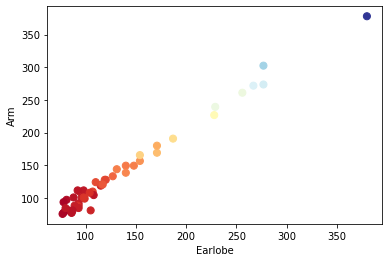

In [19]:
# PLotting the parameters
plt.xlabel("Earlobe")
plt.ylabel("Arm")
plt.scatter(data['Earlobe'],data['Arm'],s=50, c=data.Finger, cmap='RdYlBu')

In [20]:
#split data
X=data.drop(['Arm','Finger'],axis=1).values

y=data['Arm'].values

In [21]:
data.describe()

,Sex,Age,Finger,Earlobe,Arm
count,50.000000,50.000000,50.000000,50.000000,50.00000
mean,0.540000,49.740000,135.200000,131.920000,135.61200
std,0.503457,14.131756,65.487185,65.767631,67.12326
min,0.000000,21.000000,76.000000,77.000000,75.60000
25%,0.000000,43.000000,92.500000,92.000000,89.10000
50%,1.000000,50.500000,108.000000,106.000000,110.70000
75%,1.000000,61.250000,148.250000,146.000000,149.40000
max,1.000000,77.000000,380.000000,380.000000,378.00000


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)


In [23]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=lr.predict(x_test)

In [25]:
print(y_pred)

[ 92.86100042 131.17568346 110.58422779 119.72613675  82.7650858 ]


In [26]:
print(y_test,'\n',y_pred)

[ 84.6 133.2 108.  118.8  81. ] 
 [ 92.86100042 131.17568346 110.58422779 119.72613675  82.7650858 ]


In [27]:
z=y_test-y_pred
print(z)

[-8.26100042  2.02431654 -2.58422779 -0.92613675 -1.7650858 ]


In [28]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.074149624143803

In [29]:
from sklearn import metrics
#print result of mae
print("mae",metrics.mean_absolute_error(y_test,y_pred))
print("mse",metrics.mean_squared_error(y_test,y_pred))
print("rmse",(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

mae 3.1121534606574444
mse 16.598695159911088
rmse 4.074149624143803


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


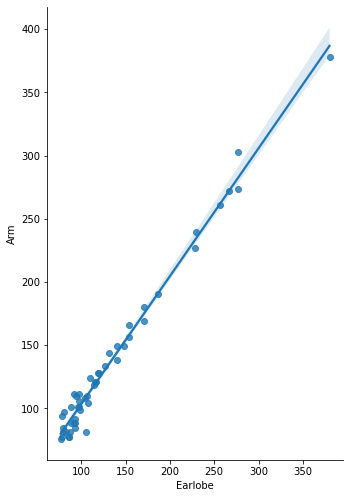

In [30]:
import seaborn as sns

sns.pairplot(data, x_vars=['Earlobe'], y_vars='Arm', size=7, aspect=0.7, kind='reg')
